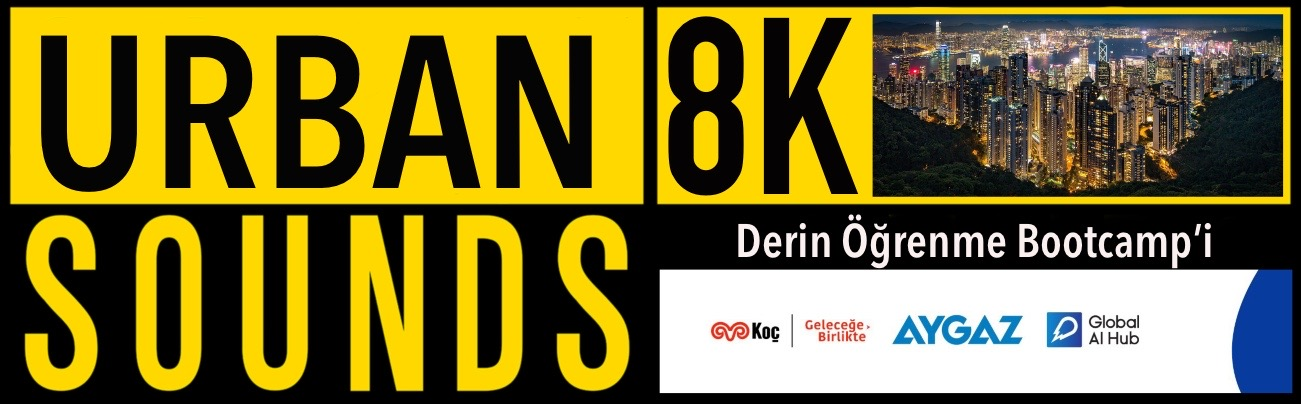


# <font color=orange>**Urban Sounds Classification**</font>

# <font color=gray>**Model Preparation and Training**</font>

### <font color=darkgray>**Kütüphanelerin Yüklenmesi**</font>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive 
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from sklearn.model_selection import train_test_split

### <font color=darkgray>**Veri Setinin Yüklenmesi**</font>

In [10]:
#Kayıt edilen dosyaları açmak için de np.load('file') kullanılır.

X_train=np.load('/content/drive/MyDrive/GAIH_Project/veriSetleri/X_train.npy')
X_test=np.load('/content/drive/MyDrive/GAIH_Project/veriSetleri/X_test.npy')
X_val=np.load('/content/drive/MyDrive/GAIH_Project/veriSetleri/X_val.npy')
y_train=np.load('/content/drive/MyDrive/GAIH_Project/veriSetleri/y_train.npy')
y_test=np.load('/content/drive/MyDrive/GAIH_Project/veriSetleri/y_test.npy')
y_val=np.load('/content/drive/MyDrive/GAIH_Project/veriSetleri/y_val.npy')

In [11]:
#Nihai sonuçları görmek için her veri kümesindeki gözlem sayısını kontrol edelim.

print(f'X_train : {len(X_train)}')
print(f'y_train : {len(y_train)}')
print(f'X_val : {len(X_val)}')
print(f'y_val : {len(y_val)}')
print(f'X_test : {len(X_test)}')
print(f'y_test : {len(y_test)}')

X_train : 6985
y_train : 6985
X_val : 873
y_val : 873
X_test : 874
y_test : 874


### <font color=darkgray>**Sinir Ağının Oluşturulması**</font>

#### <font color=darkgray>**Model Oluşturma**</font>

In [12]:
model=Sequential()
#input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64, 1)))

#hidden layers
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

#Flatten the convolution layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

#output layer
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])



#### <font color=darkgray>**Modeli Eğitme**</font>

In [13]:
#Kayıp oranları artmaya başladığında bunu durdurmak ve eğrilerdeki zikzakları yumuşatma için patience kullanılır. 
earlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)

results = model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),callbacks=earlyStopping)

Epoch 1/50
219/219 [==============================] - 36s 163ms/step - loss: 1.2150 - accuracy: 0.6213 - val_loss: 5.7201 - val_accuracy: 0.1088
Epoch 2/50
219/219 [==============================] - 37s 170ms/step - loss: 0.5492 - accuracy: 0.8251 - val_loss: 7.9791 - val_accuracy: 0.1329
Epoch 3/50
219/219 [==============================] - 35s 161ms/step - loss: 0.2781 - accuracy: 0.9087 - val_loss: 1.2214 - val_accuracy: 0.6552
Epoch 4/50
219/219 [==============================] - 35s 161ms/step - loss: 0.1473 - accuracy: 0.9535 - val_loss: 0.7172 - val_accuracy: 0.7973
Epoch 5/50
219/219 [==============================] - 35s 161ms/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.6900 - val_accuracy: 0.8144
Epoch 6/50
219/219 [==============================] - 35s 158ms/step - loss: 0.0650 - accuracy: 0.9820 - val_loss: 0.8079 - val_accuracy: 0.8179
Epoch 7/50
219/219 [==============================] - 37s 169ms/step - loss: 0.0402 - accuracy: 0.9887 - val_loss: 1.1541 - val_ac

#### <font color=darkgray>**Sonuçları Görselleştirme**</font>

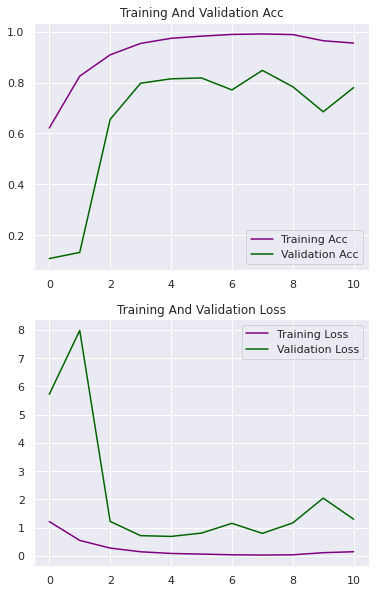

In [14]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.plot(results.history['accuracy'], label='Training Acc',c='purple')
plt.plot(results.history['val_accuracy'], label='Validation Acc',c='darkgreen')
plt.title('Training And Validation Acc')
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(results.history['loss'], label='Training Loss',c='purple')
plt.plot(results.history['val_loss'], label='Validation Loss',c='darkgreen')
plt.title('Training And Validation Loss')
plt.legend();

#### <font color=darkgray>**Performans Değerlendirmesi**</font>

In [15]:
result_test = model.test_on_batch(X_test,y_test)
print(result_test)

[1.1765544414520264, 0.8157894611358643]


#### <font color=darkgray>**Hiperparametre Optimizasyonu**</font>

In [16]:
model = Sequential()
num_of_classes=10

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))

model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

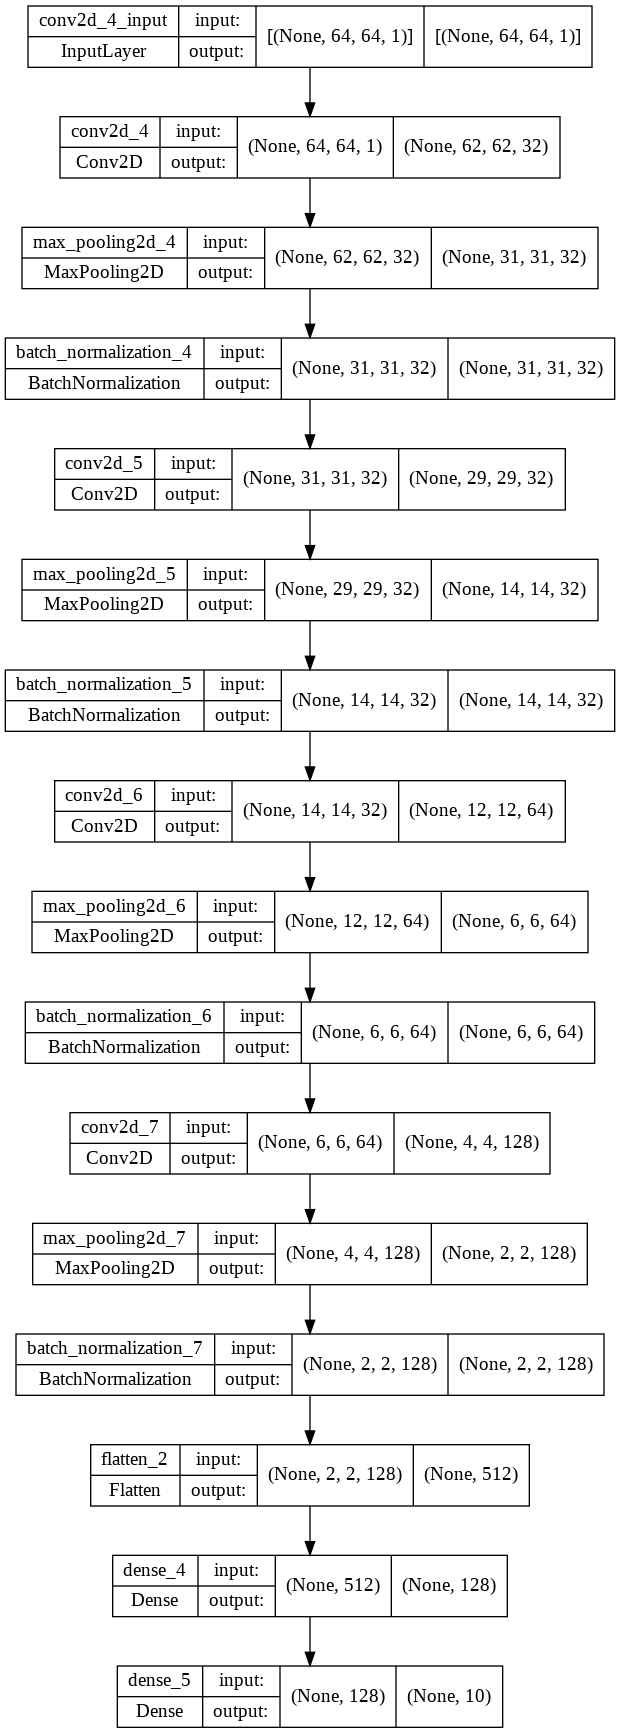

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
results = model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
219/219 [==============================] - 36s 160ms/step - loss: 1.1160 - sparse_categorical_accuracy: 0.6142 - val_loss: 4.1171 - val_sparse_categorical_accuracy: 0.1123
Epoch 2/50
219/219 [==============================] - 35s 162ms/step - loss: 0.6129 - sparse_categorical_accuracy: 0.7994 - val_loss: 3.7434 - val_sparse_categorical_accuracy: 0.1627
Epoch 3/50
219/219 [==============================] - 37s 169ms/step - loss: 0.4090 - sparse_categorical_accuracy: 0.8723 - val_loss: 0.7933 - val_sparse_categorical_accuracy: 0.7365
Epoch 4/50
219/219 [==============================] - 35s 161ms/step - loss: 0.2980 - sparse_categorical_accuracy: 0.9041 - val_loss: 0.5939 - val_sparse_categorical_accuracy: 0.8202
Epoch 5/50
219/219 [==============================] - 35s 161ms/step - loss: 0.2373 - sparse_categorical_accuracy: 0.9274 - val_loss: 0.5962 - val_sparse_categorical_accuracy: 0.8202
Epoch 6/50
219/219 [==============================] - 35s 161ms/step - loss: 0.1797 -

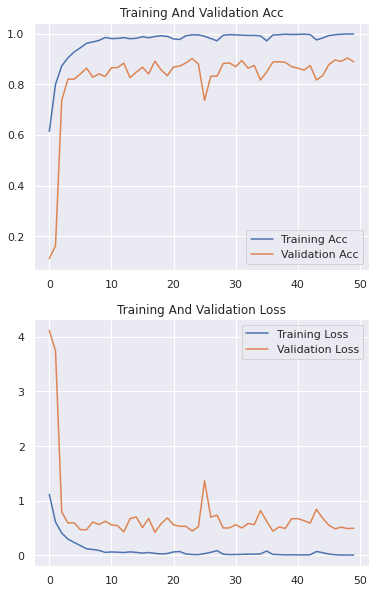

In [24]:
plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.plot(results.history['sparse_categorical_accuracy'], label='Training Acc')
plt.plot(results.history['val_sparse_categorical_accuracy'], label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend();

In [20]:
result_test = model.test_on_batch(X_test,y_test)
print(result_test)

[0.5917537808418274, 0.8844393491744995]


In [115]:
prediction_result = model.predict(X_test[870].reshape(1,64,64,1))

In [116]:
#Tahmin edilen sınıfı bulma
predicted_class = prediction_result.argmax()
#Tahmin edilen sınıfı bulun
predicted_probability = prediction_result.max()
print(f"Bu resim {predicted_class} sınıfına ait {predicted_probability} % olasılıkla. ")

Bu resim 8 sınıfına ait 0.9845871925354004 % olasılıkla. 


#### <font color=darkgray>**Try a Prediction**</font> 

Şimdi 'Siren' etiketli **7** sınıfından bir tane görüntü alıp test edelim.

In [43]:
import cv2 as cv

In [60]:
datadir=('/content/drive/MyDrive/GAIH_Project/spectrograms/7/62837-7-1-69.png')

In [61]:
img = cv.imread(datadir)

In [62]:
type(img)

numpy.ndarray

In [52]:
img.shape

(374, 500, 3)

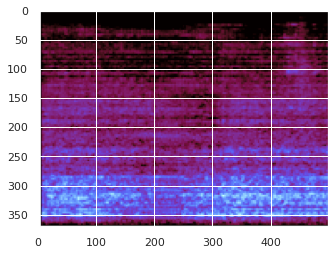

In [63]:
plt.imshow(img)
plt.show()

Görüntüyü model için hazırlama:

In [64]:
img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img=cv.resize(img,(64,64),interpolation=cv.INTER_AREA) 
img=img/255.0
img

array([[0.63137255, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.63137255, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.63137255, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71764706, 0.38823529, 0.35686275, ..., 0.22745098, 0.27058824,
        0.2745098 ],
       [0.6627451 , 0.14509804, 0.15686275, ..., 0.10980392, 0.15686275,
        0.18039216],
       [0.88235294, 0.68235294, 0.68235294, ..., 0.68627451, 0.68627451,
        0.69803922]])

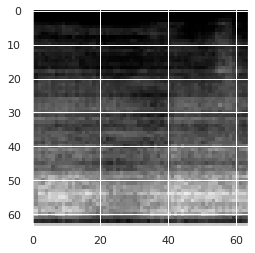

In [69]:
plt.imshow(img,cmap='gray')
plt.show()

In [117]:
prediction_result = model.predict(img.reshape(1,64,64,1))

In [118]:
#Tahmin edilen sınıfı bulma
predicted_class = prediction_result.argmax()
#Tahmin edilen sınıfı bulun
predicted_probability = prediction_result.max()
print(f"Bu resim {predicted_class} sınıfına ait {predicted_probability} % olasılıkla. ")

Bu resim 7 sınıfına ait 0.999967098236084 % olasılıkla. 
